In [38]:
import matplotlib.pyplot as plt
from baselines.common import plot_util as pu
import warnings
import pandas
warnings.filterwarnings('ignore', 'Pandas doesn\'t allow')

If you want to average results for multiple seeds, LOG_DIRS must contain subfolders in the following format: ```<name_exp0>-0```, ```<name_exp0>-1```, ```<name_exp1>-0```, ```<name_exp1>-1```. Where names correspond to experiments you want to compare separated with random seeds by dash.

In [80]:
# TODO: may need to modify these values
game_score_ranges = {
   'SpaceInvadersNoFrameskip-v4': (0, 650),
   'SixActionBreakoutNoFrameskip-v4': (0, 150), 
   'PongNoFrameskip-v4': (-21, 21), 
}

friendly_names = {
    'SpaceInvadersNoFrameskip-v4': 'space invaders',
    'SixActionBreakoutNoFrameskip-v4': 'breakout', 
    'PongNoFrameskip-v4': 'pong', 
}
    
def plot_train(game):
    directory = f'logs/{game}/'
    results = pu.load_results(directory)
    fig = pu.plot_results(results[:1], average_group=True, shaded_std=True)
    plt.title(game + ' results')
    return results[:1]

def plot_eval(game):
    csv = f'logs/{game}/cl_evals.csv'
    df = pandas.read_csv(csv)
        
    # normalizing the game scores
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    for game, (score_min, score_max) in game_score_ranges.items():
        df[game] = (df[game] - score_min) / (score_max - score_min)
        ax.plot(df['timestep'] / 1e6, df[game], label=friendly_names[game])
    
    ax.set_title('Average Game Scores', fontsize=24)
    ax.set_ylabel('normalized score', fontsize=16)
    ax.set_xlabel('timestep (millions)', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    fig.legend(fontsize=16)
    
    return df


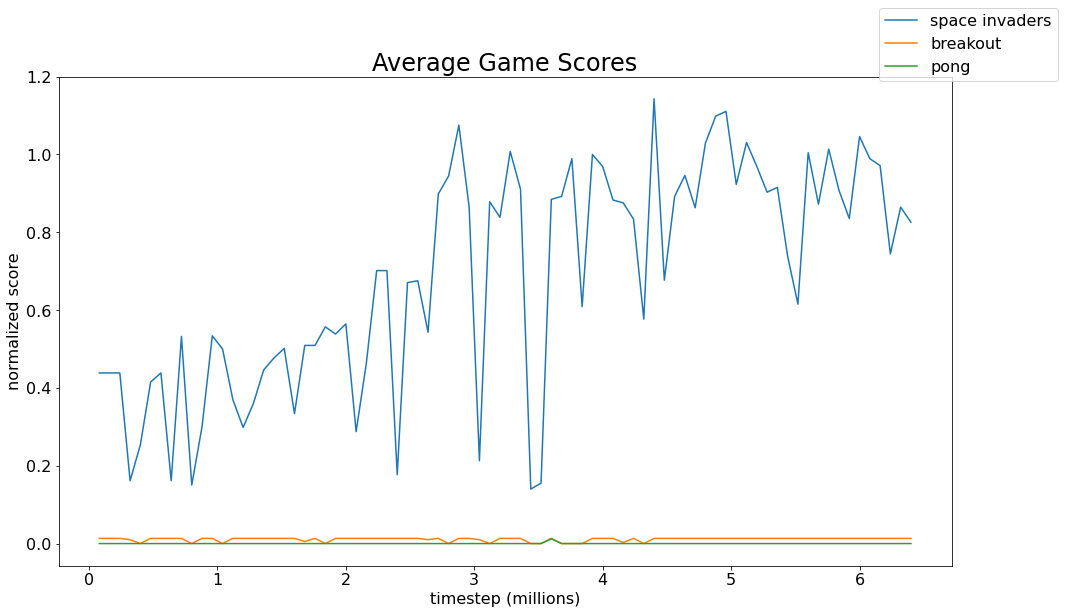

In [87]:
plot_eval('exp0_baseline_spaceinvaders');

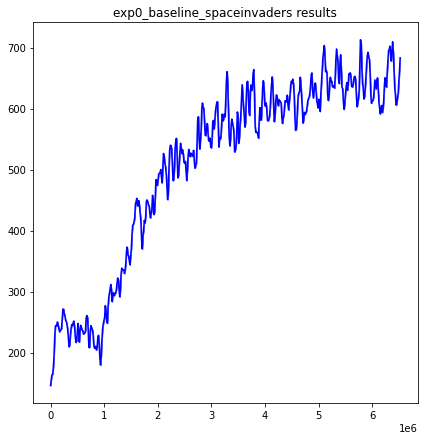

In [88]:
plot_train('exp0_baseline_spaceinvaders');

In [3]:
# plot('exp1_cl_0.6_pruning_spaceinvaders');

AssertionError: logs/exp1_cl_0.6_pruning_spaceinvaders/ doesn't exist

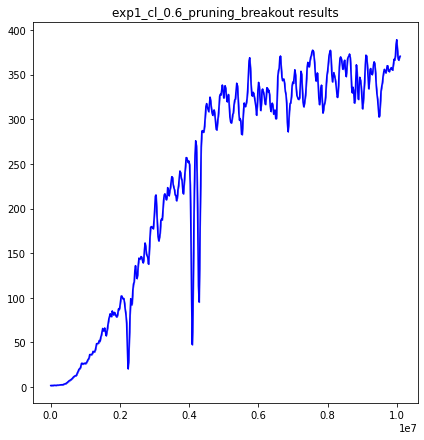

In [76]:
plot('exp1_cl_0.6_pruning_breakout');

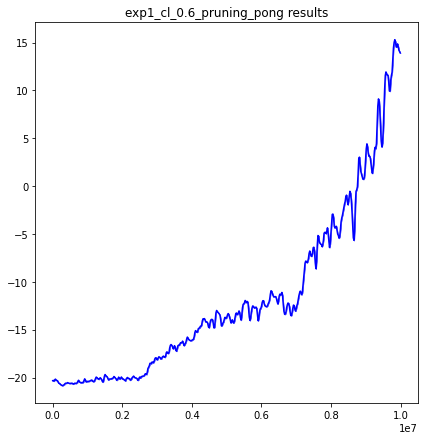

In [77]:
plot('exp1_cl_0.6_pruning_pong');

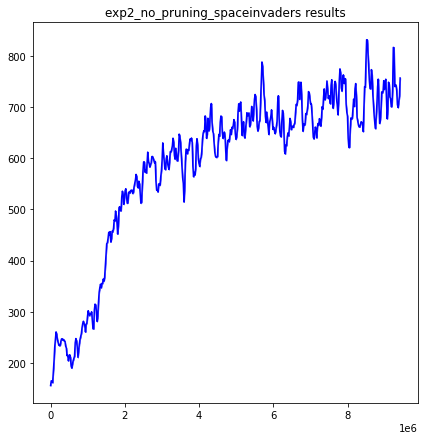

In [68]:
plot('exp2_no_pruning_spaceinvaders');

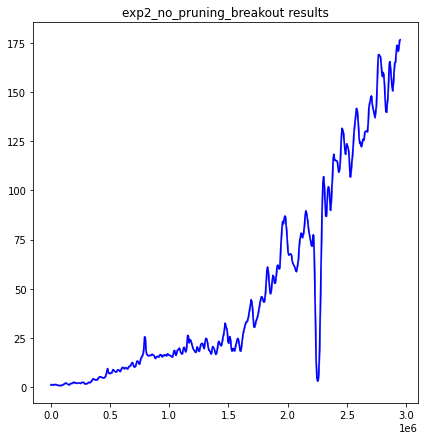

In [69]:
plot('exp2_no_pruning_breakout');

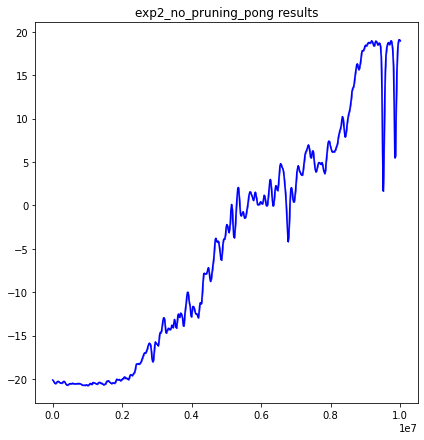

In [71]:
plot('exp2_no_pruning_pong');

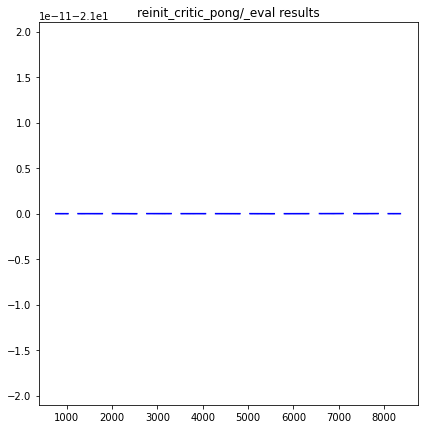

In [74]:
plot('reinit_critic_pong/_eval');